## CardioPy Example Analysis

In [1]:
# This is an example of how to conduct automatic R peak detections and calculate HRV statistics with CardioPy
# The example data file contains high-frequency noise, as well as segments of missing data to demonstrate how to handle these datasets

# Updated 9-21-2021

In [2]:
# pick inline plotting or pop-out plots. We'll use inline plots here.

# inline plotting in jupyter
%matplotlib notebook

# uncomment for pop-out plots instead
# %matplotlib qt

In [3]:
#use pwd to check your directory

In [4]:
pwd

'/Users/natasharecoder/CardioPy/example_run'

In [5]:
#use cd to change your directory that that containing cardiopy (lower case) if need be

In [6]:
cd ..

/Users/natasharecoder/CardioPy


In [7]:
# import the ekg module
from cardiopy import ekg

#### 1. Specify the data file name and location

In [8]:
# NOTE: if using the example file, first download with curl

In [9]:
# name of csv file containing ekg data
fname = 'HCXXX_2001-01-01_awake_cycle1_epoch1_222000.csv'
# location of file
fpath = '/Users/NatashaRecoder/CardioPy/example_run'
# location where output should be saved
savedir = 'C:/Users/JackieGottshall/Downloads'

#### 2. Create the EKG object and detect Rpeaks

In [10]:
# create the EKG object 'e' and detect peaks
# we'll set polarity to negative since our R-peaks deflect downwards
%time e = ekg.EKG(fname, fpath, polarity='negative')

EKG successfully imported.
R peak detection complete
R-R intervals calculated
CPU times: user 232 ms, sys: 25.2 ms, total: 257 ms
Wall time: 256 ms


<IPython.core.display.Javascript object>


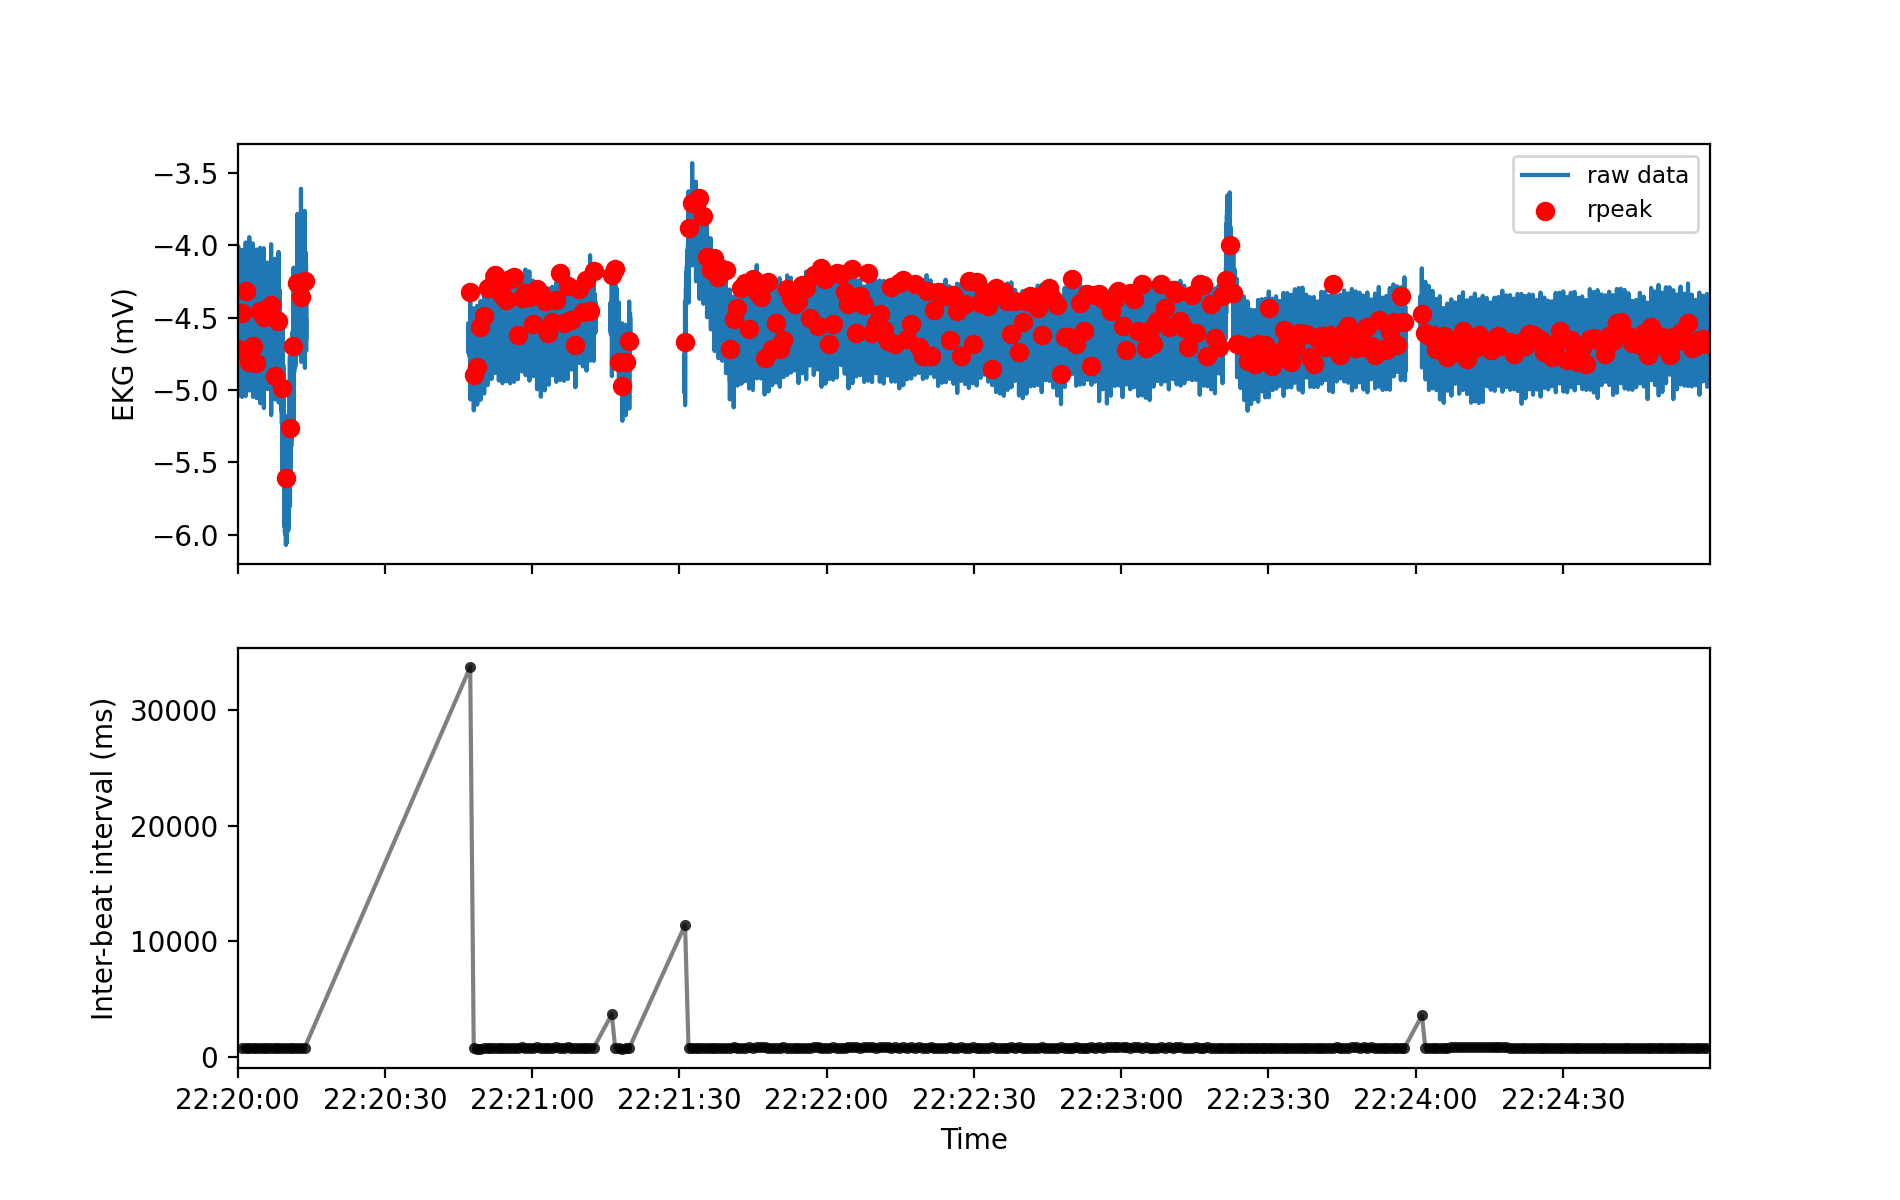

In [33]:
# visualise the detections. zoom in on regions by clicking the square icon and then selecting region
e.plotpeaks()

<IPython.core.display.Javascript object>


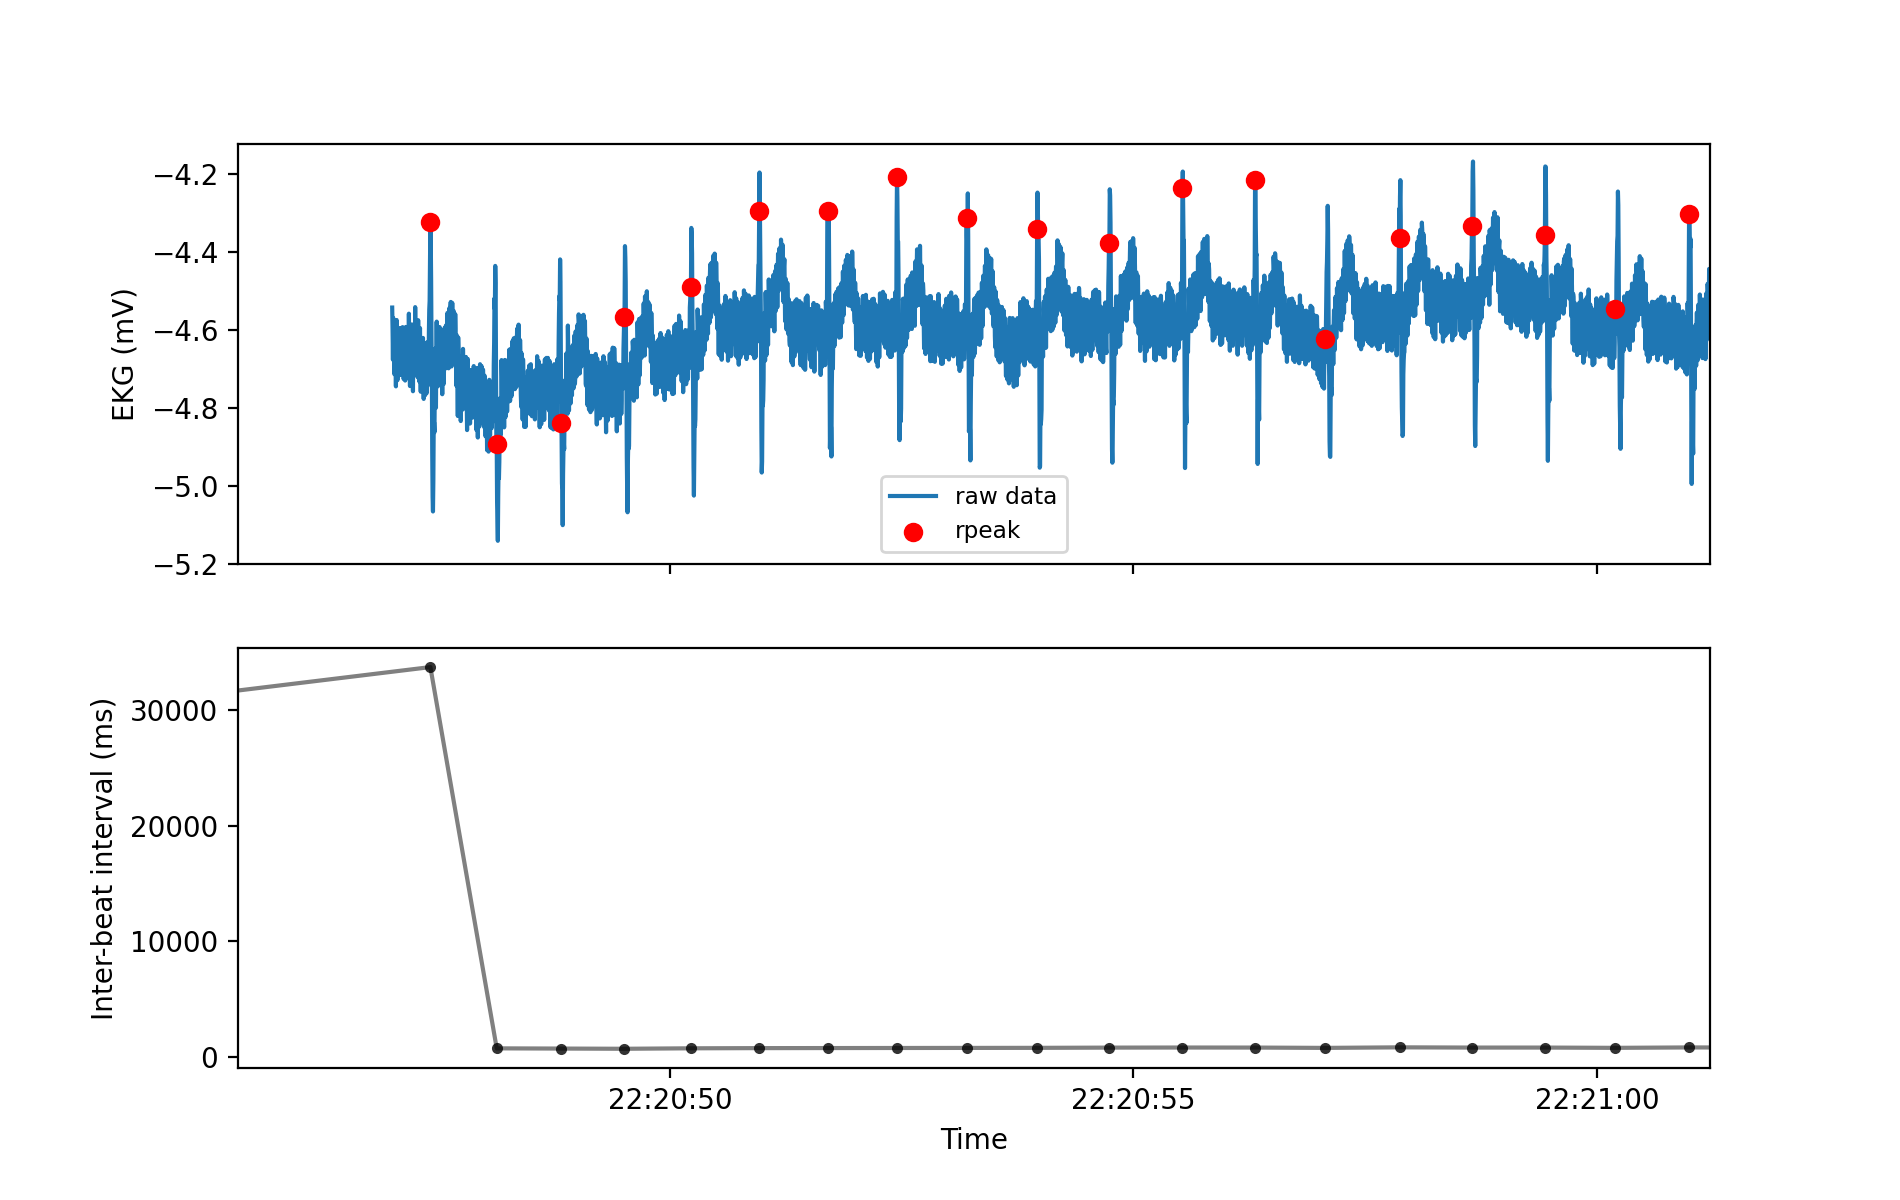

In [36]:
# zoomed in
e.plotpeaks()

In [ ]:
# For the removal of false detections, or addition of undetected peaks see ../CardioPy_Example_Analysis_Manual

#### 3. Remove IBIs from any missing data or abnormal beats

In [37]:
# IBI removal MUST be done after all false peaks are removed and missed peaks added, or ibi values will be incorrect

<IPython.core.display.Javascript object>


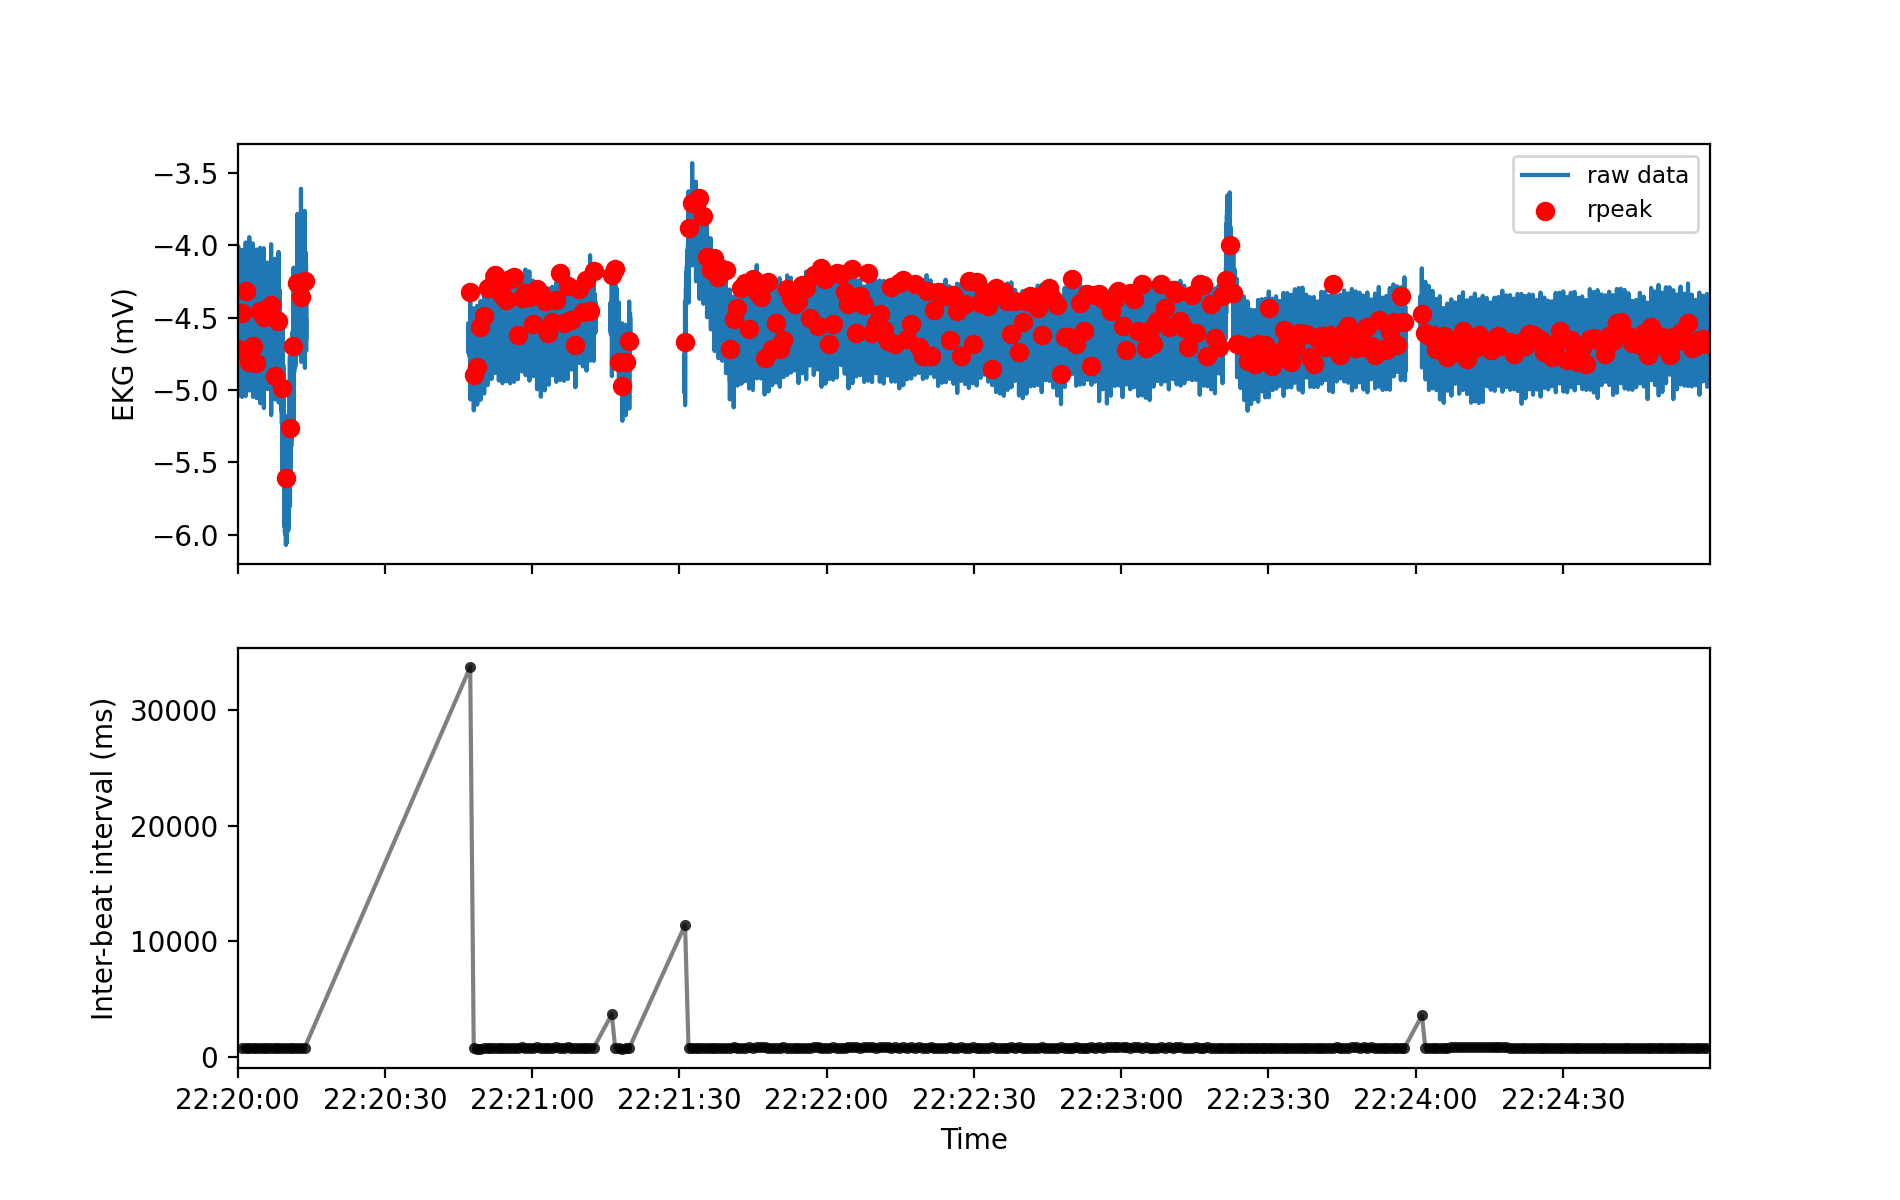

In [40]:
# inspect data for missing segments - we have a few in our dataset
e.plotpeaks()

In [11]:
# remove ibis that correspond to missing data with e.rm_ibi
# the thres parameter will automatically remove ibis greater than a given ms length
# manual removal can be used for all other false ibis. this can be done in one call or sequentially
e.rm_ibi(thres = 3000)

IBIs greater than 3000 milliseconds detected
Automatically remove? [y/n]: y
4 IBIs removed.
ibi_artifacts series updated.
R peaks dataframe updated.

Manually remove IBIs? [y/n]: n
Done.


<IPython.core.display.Javascript object>


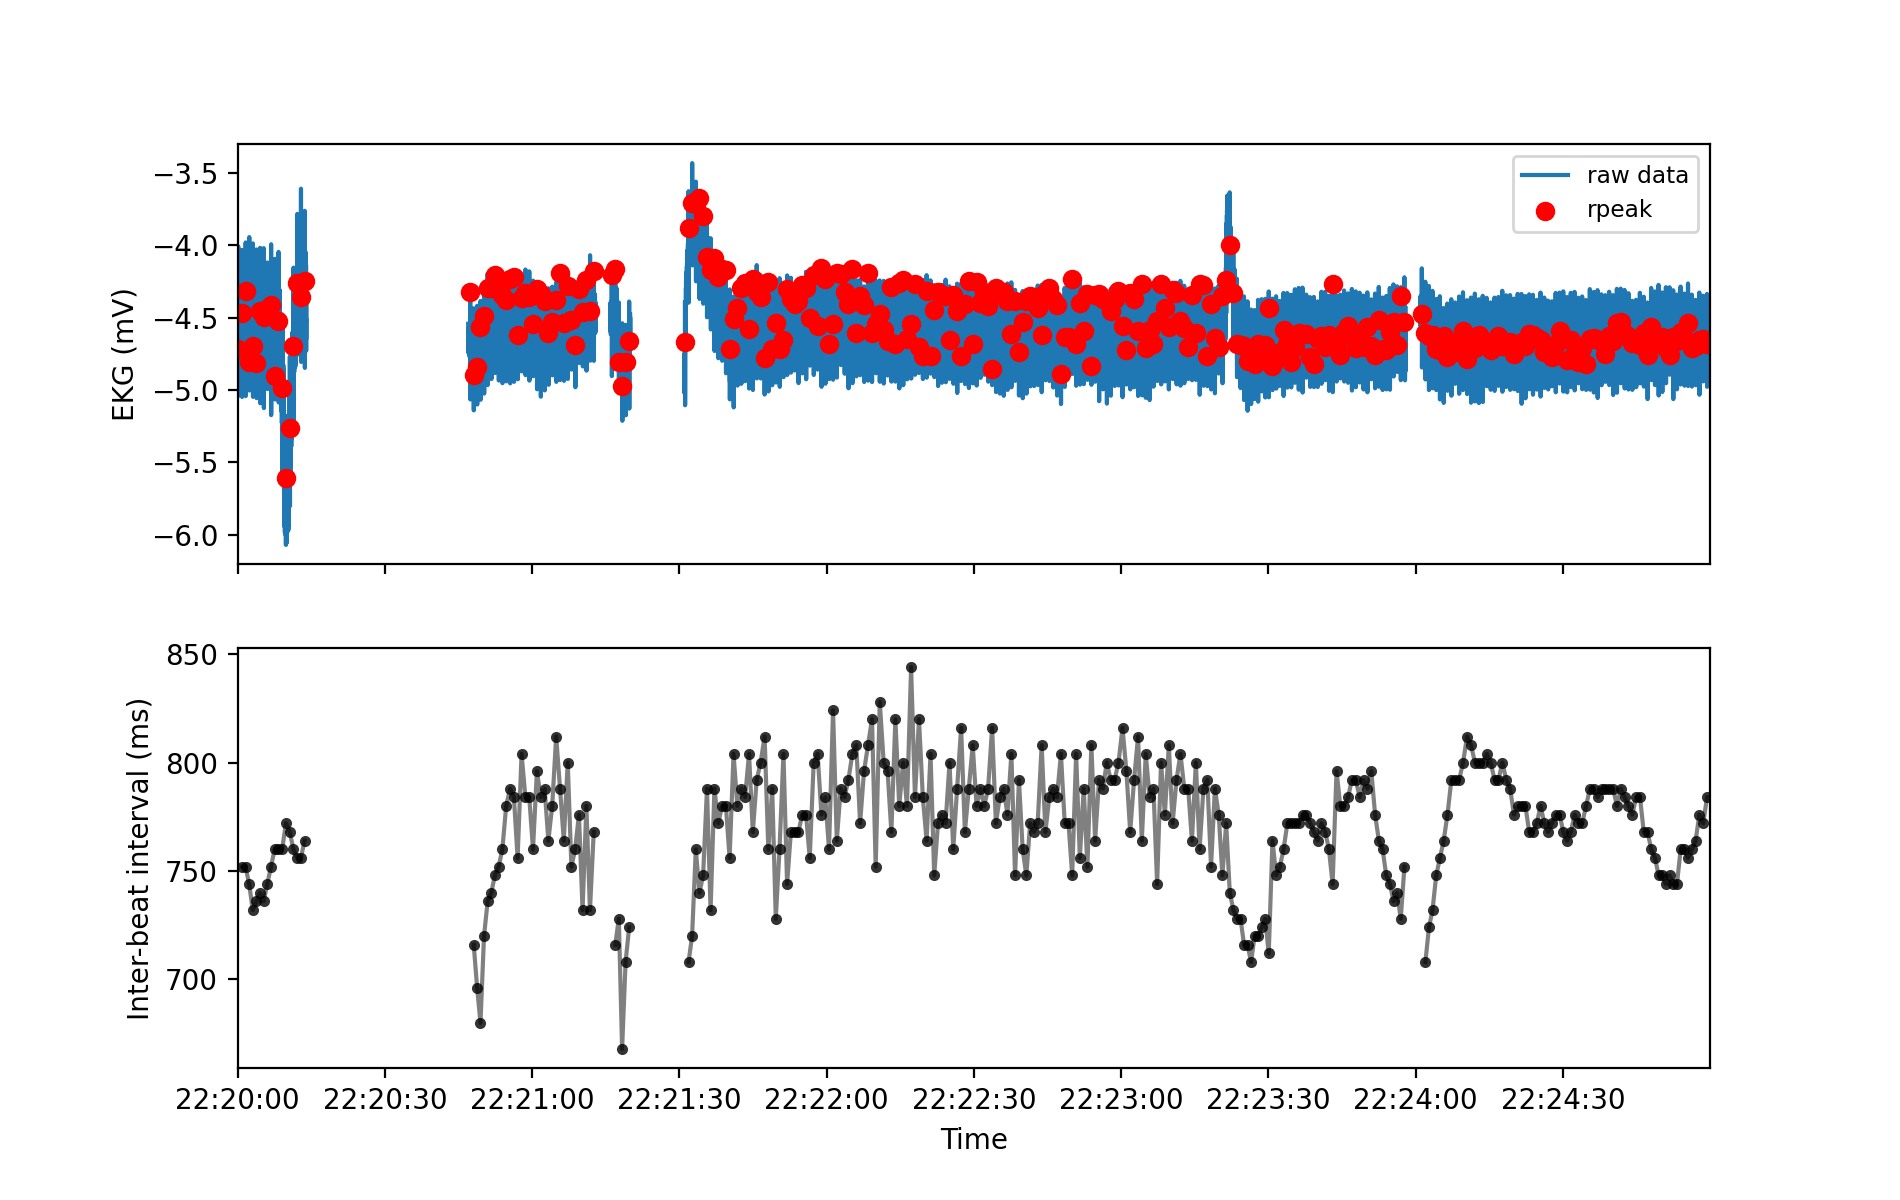

In [12]:
# inspect - looks good
e.plotpeaks()

In [ ]:
# Manually remove remaining false ibis - we don't have any left so we'll skip this step
e.rm_ibi()

In [ ]:
# inspect the data again to see if there are still false ibis present
e.plotpeaks()

#### 6. Once cleaning is complete, export data and analyze

In [13]:
e.export_RR(savedir)

C:/Users/JackieGottshall/Downloads does not exist. Creating directory...
R peak artifacts exported.
R peak additions exported.
R peaks exported.
IBI artifacts exported.
rr intervals exported.
nn intervals exported.
Done.


In [14]:
# Calculate time and frequency domain statistics using e.hrv_stats()
e.hrv_stats()

Calculating time domain statistics...
Time domain stats stored in obj.time_stats

Interpolating and resampling tachogram...
Calculating power spectrum...
Calculating frequency domain measures...
Frequency measures stored in obj.freq_stats

Done.


/Users/natasharecoder/CardioPy/cardiopy/ekg.py:1041: RuntimeWarning: Not adaptively combining the spectral estimators due to a low number of tapers (1 < 3).
  pwr, freqs = psd_array_multitaper(self.ii_interp, sf_interp, adaptive=True,


<IPython.core.display.Javascript object>


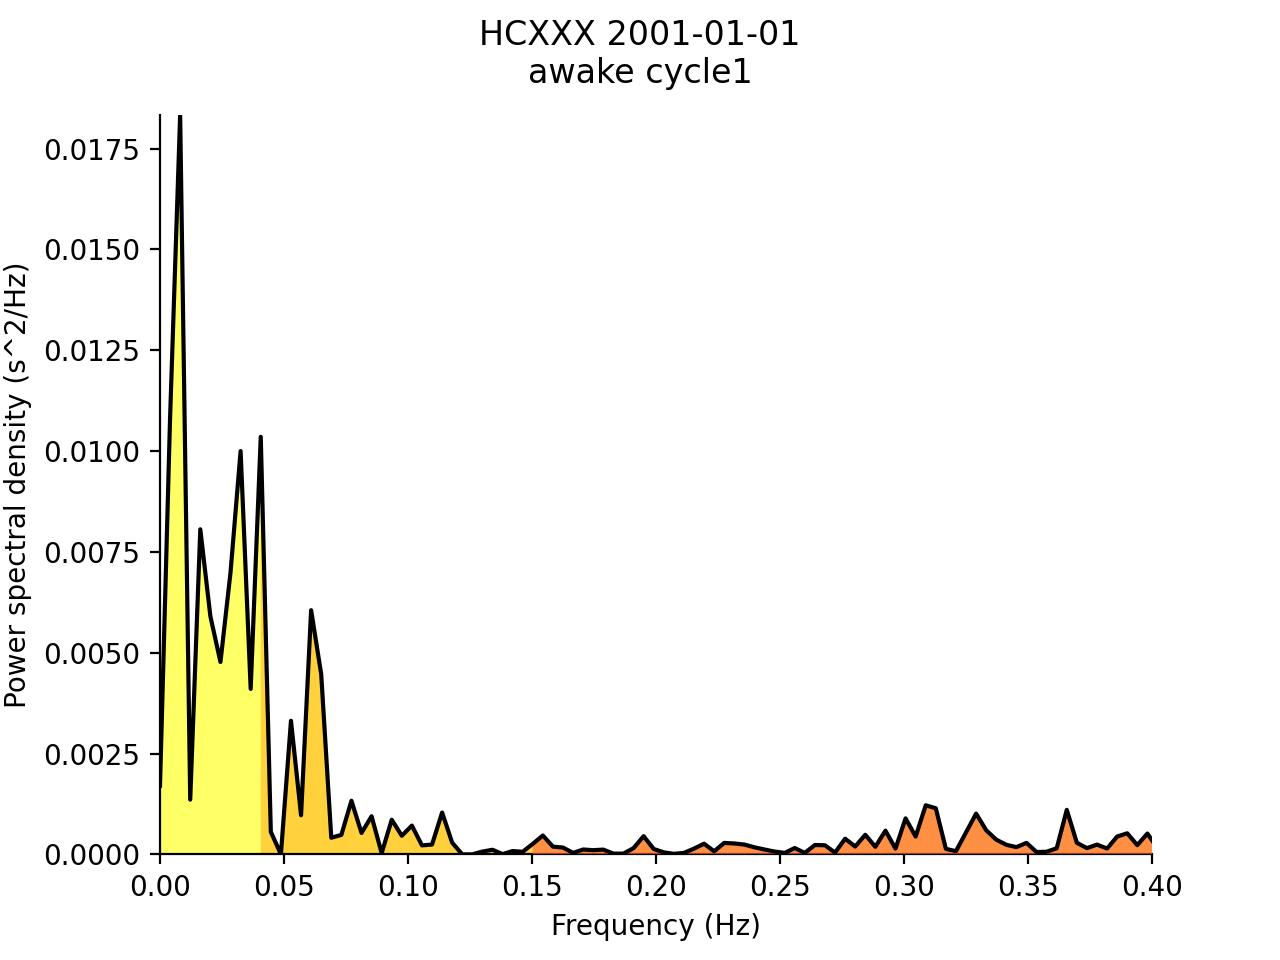

In [15]:
# plot Power spectrum and save figure
fig = e.plotPS(savedir = savedir)

In [23]:
# Save HRV statistics to a report
e.to_report(savedir)

Files will be saved to C:/Users/JackieGottshall/Downloads


In [24]:
# Export data to a spreadsheet
e.to_spreadsheet(spreadsheet = 'HRV_FullClean_Stats.csv', savedir = savedir)

Data added to HRV_FullClean_Stats.csv
